In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as mplot
from matplotlib.colors import ListedColormap
import os
import subprocess
import sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,  precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import shap
import lime
from lime import lime_tabular
import random

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import StandardScaler

from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns

from tabulate import tabulate
from xgboost import XGBClassifier



In [51]:
dataSetIndex = 6
needToMakePictureOfTrees = 0
''' ---------------------------------------------------------- '''
dataSetFilePath = ""
dataSetName = ""
dataSetResultDirectory = "./"

if(dataSetIndex == 0):
    dataSetFilePath = "./heartDisease/0_statLog_dataSet.csv"
    dataSetName = "SateLog_DataSet"
elif (dataSetIndex == 1):
    dataSetFilePath = "./heartDisease/1_heart_statlog_cleveland_hungary_final.csv"
    dataSetName = "ALL_StateLog_CleveLand_Hungary"
elif (dataSetIndex == 2):
    dataSetFilePath = "./heartDisease/2_cleveland.csv"
    dataSetName = "Cleveland"
elif (dataSetIndex == 3):
    dataSetFilePath = "./heartDisease/3_framingham.csv"
    dataSetName = "framingham"
elif (dataSetIndex == 4):
    dataSetFilePath = "./heartDisease/4_CardiacPrediction.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 5):
    dataSetFilePath = "./heartDisease/5_CardiacPredictionLessDimensions.xlsx"
    dataSetName = "CardiacPrediction"
elif (dataSetIndex == 6):
    dataSetFilePath = "./heartDisease/6_CardiacPredictionFewDimensions.xlsx"
    dataSetName = "CardiacPrediction"
else:
    dataSetFilePath = ""
    dataSetName = ""

if(dataSetIndex==4 or dataSetIndex==5 or dataSetIndex==6):
    #fileData = pd.read_excel(dataSetFilePath, sheet_name='CoroHeartDis')
    fileData = pd.read_excel(dataSetFilePath)
else:
    fileData = pd.read_csv(dataSetFilePath)

#print("Shape of fileData: {}".format(fileData.shape))
#print("Column Headings: {}".format(fileData.__dataframe__().column_names()))
#print("Number of Records: {}".format(fileData.__dataframe__().num_rows()))



num_rows_before = fileData.shape[0] 
fileData.drop_duplicates(inplace=True) 
num_rows_after = fileData.shape[0] 
num_duplicates_removed = num_rows_before - num_rows_after
print(f"Number of duplicate records removed: {num_duplicates_removed}")
 
 # Preprocess Steps from the ChatGPT
# 1. Handling Missing Values:
fileData = fileData.dropna()
print("Shape of fileData: {}".format(fileData.shape))              
#fileData.replace({'?': np.nan}).dropna().astype(float)
#fileData = fileData.fillna(0)

'''
for columnName in fileData.__dataframe__().column_names():
    #print("Column Name: {}, Len:{} ".format(columnName,len(fileData[columnName]))) 
    fileData[columnName] = np.floor(pd.to_numeric(fileData[columnName], errors='coerce')).astype('Int64') 
    meanValue = np.mean(fileData[columnName])
    print("Column Name: {}, means:{} ".format(columnName, meanValue))
    for i in range( len(fileData[columnName]) ):
        print("----> Column Name: {}, Index:{} , Value:{} ".format(columnName, i, (fileData[columnName][i]) ))
            #print("%%%%----> Column Name: {}, Index:{} , Value:{} \n\n".format(columnName, i, str(fileData[columnName][i]) ))
            fileData[columnName][i] = meanValue
'''

fileData = fileData.fillna(0)
# 2. Handling Outliers:
# 3. Feature Scaling:
# 4. Encoding Categorical Variables:
# 5. Feature Engineering:
# 6. Handling Skewed Distributions:
# 7. Dimensionality Reduction:
# 8. Handling Imbalanced Classes:
# 9. Normalization of Data:
# 10. Data Splitting:

print("Shape of fileData End: {}".format(fileData.shape))



dataSetResultDirectory += dataSetName
dataSetResultDirectory += "DataSetResult/"
if not os.path.isdir(dataSetResultDirectory):
    os.makedirs(dataSetResultDirectory)

dataSetName += " {}".format(fileData.shape)

if(dataSetIndex == 0): 
    X = fileData[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]  # Features
    Y = fileData['target']  # Labels
elif (dataSetIndex == 1): 
    #X = fileData[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']]  # Features
    X = fileData[['fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak']]  # Features LIME KNN
    Y = fileData['target']  # Labels
elif(dataSetIndex == 2): 
    X = fileData[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]  # Features
    Y = fileData['target']  # Labels
elif(dataSetIndex == 3): 
    X = fileData.drop('TenYearCHD', axis=1)  # Features
    Y = fileData['TenYearCHD']  # Labels
elif(dataSetIndex == 4): 
    X = fileData.drop('CoronaryHeartDisease', axis=1)  # Features
    Y = fileData['CoronaryHeartDisease']  # Labels
else: 
    X = fileData.drop('CoronaryHeartDisease', axis=1)  # Features
    Y = fileData['CoronaryHeartDisease']  # Labels



#print("\n")
#print("columns of x:: {} \n\n and features of X: {}".format(len(X.columns), X.columns))




Number of duplicate records removed: 0
Shape of fileData: (37079, 40)
Shape of fileData End: (37079, 40)


In [ ]:
fileData.hist(figsize=(10, 8))
mplot.tight_layout()
mplot.show()
mplot.close()

Target Column Name: CoronaryHeartDisease


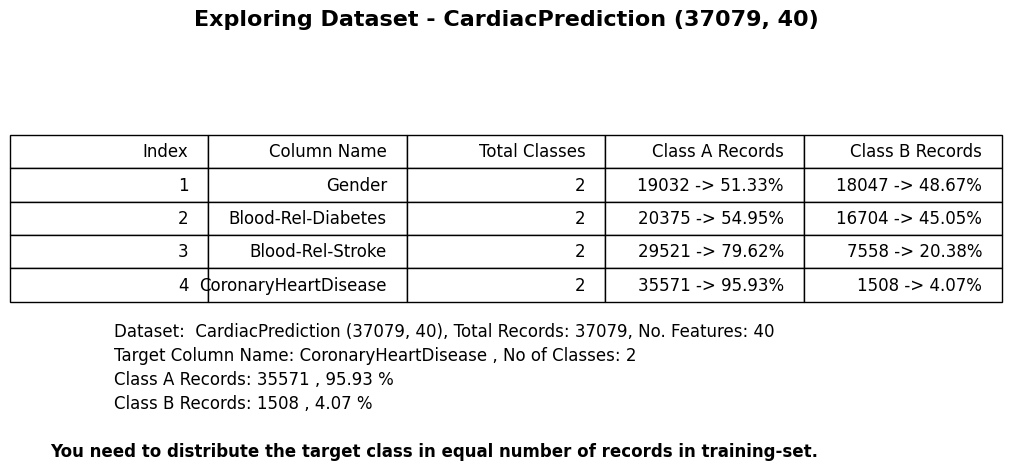

In [52]:
columns = fileData.__dataframe__().column_names() 
totalRecords = (fileData.__dataframe__().num_rows())
columnsForGraph = []
columnsForGraph.clear()
tableDataRow = []
for column in columns:
    singleColumnCount = fileData[column].value_counts()
    if(len(singleColumnCount) < 3):
        #print('Column Name:{} -> total records:{}'.format(column, totalRecords ) )
        #print('Number of classes:', len(singleColumnCount))
        #print('Class distribution:')
        #print(singleColumnCount)
        #print("np Array: {}".format(np.array(singleColumnCount)))
        #print("index: 0: {} -> {} %".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100))
        #print("index: 1: {} -> {} %".format(np.array(singleColumnCount)[1], ( np.array(singleColumnCount)[1] /totalRecords) * 100))  
        #print('---------------------------------------------------------------')
        columnsForGraph.append(column)
 

tableDataRow = [
    ['Index', 'Column Name', 'Total Classes','Class A Records','Class B Records'],
    
]

indexx = 1
for column in columnsForGraph:
    singleColumnCount = fileData[column].value_counts()
    singleRowInTable = [] 
    singleRowInTable.append(indexx)
    singleRowInTable.append(column)
    singleRowInTable.append(len(singleColumnCount))
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[0], (np.array(singleColumnCount)[0] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    cellDataString = "{} -> {:.2f}%".format(np.array(singleColumnCount)[1], (np.array(singleColumnCount)[1] /totalRecords) * 100)
    singleRowInTable.append((cellDataString)) 
    indexx += 1
    tableDataRow.append(singleRowInTable) 

# Create the figure and axes
fig, ax = mplot.subplots() 
table = mplot.table(cellText=tableDataRow, loc='center') 

table.auto_set_font_size(False)
table.set_fontsize(12) 
table.scale(2.0, 2.0)

#mplot.subplot(1, 2, 2)
#mplot.text(0.5, 0.5, f"The column with the most records per class is: {max_count_column}", fontweight='bold', fontsize=12)


print("Target Column Name: {}".format(columns[-1]))


dataSetString = "Dataset:  {}, Total Records: {}, No. Features: {}".format(dataSetName, totalRecords, fileData.__dataframe__().num_columns())
target ="Target Column Name: {} , No of Classes: {}".format(columns[-1], len(fileData[columns[-1]].value_counts()))
distributionOfTargetClassA ="Class A Records: {} , {:.2f} %".format(np.array(fileData[columns[-1]].value_counts())[0], (np.array(fileData[columns[-1]].value_counts())[0] /totalRecords) * 100)
distributionOfTargetClassB ="Class B Records: {} , {:.2f} %".format(np.array(fileData[columns[-1]].value_counts())[1], (np.array(fileData[columns[-1]].value_counts())[1] /totalRecords) * 100)

fig.text(-0.1, +0.25,  dataSetString, horizontalalignment='left', wrap=False , fontsize=12 )  
fig.text(-0.1, +0.20,  target, horizontalalignment='left', wrap=False  , fontsize=12 )   
fig.text(-0.1, 0.15,  distributionOfTargetClassA, horizontalalignment='left', wrap=False , fontsize=12  )   
fig.text(-0.1, 0.10,  distributionOfTargetClassB, horizontalalignment='left', wrap=False  , fontsize=12 )   


remarks = "You need to distribute the target class in equal number of records in training-set."
fig.text(-0.2, -0.0,  remarks, horizontalalignment='left', wrap=True ,fontsize=12, fontweight='bold' )   
 
mplot.axis('off')
mplot.title(f'Exploring Dataset - {dataSetName}' ,fontsize=16, fontweight='bold') 

picturePath = "{}1.DataSet_analysis_{}.png".format(dataSetResultDirectory, dataSetName)
mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
#mplot.savefig('DataSet_analysis.png', dpi=300)
mplot.show()
mplot.close()
 

In [ ]:

print("columns of x:: {} \n\n and features of X: {}".format(len(X.columns), X.columns))
 
print("***************************************") 

print("Shape of fileData: {} , target Len:{}".format(fileData.shape, len(Y)))
print("X: {} , Y:{}".format(X.shape, Y.shape))
#print("\n\nX: head:: \n{}".format(X.head()))
#print("\n\nY: head::\n {}".format(Y.head()))

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) # 70% training and 30% test

print("\n X Train: Shape::\n {}".format(X_train.shape))
print("\n X Train: head::\n {}".format(X_train.columns))
print("\n X Test: head:: \n{}".format(X_test.columns))
print("\n Y Train: shape::\n {}".format(y_train.shape)) 
print("\n Y Test: shape::\n {}".format(y_test.shape)) 
 
instance = np.array(X_test)  # Example: explaining the first instance in the dataset
 



In [ ]:
def makeCorrelationPic(correlationMatrix, numberOfTopFeatures, targetColumnName):     
    correlation_values = correlationMatrix.abs()
    sorted_correlation = correlation_values.unstack().sort_values(ascending=False)
    sorted_correlation = sorted_correlation[sorted_correlation != 1.0]

    num_features = numberOfTopFeatures  # Number of top features to display
    top_features = sorted_correlation.head(num_features)
    print("Top", num_features, "features based on correlation:")
    print(top_features)
 
    top_features = correlationMatrix.abs().nlargest(numberOfTopFeatures, targetColumnName)[targetColumnName].index
    top_correlation_matrix = correlationMatrix.loc[top_features, top_features]

    mplot.figure(figsize=(10, 8))
    sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm')
    # Set the title of the plot
    mplot.title('Correlation Heatmap ({})'.format(dataSetName))
    
    picturePath = "Correlation_Matrix_DateSetName_{}.png".format(dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    mplot.show()
    mplot.close()
def plot_classification_report(title, dataSetName, y_tru, y_prd, figsize=(6, 6), ax=None):
    #mplot.figure(figsize=figsize)
    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = ['Healthy', 'Heart Disease']
    rep = np.array( precision_recall_fscore_support(y_tru, y_prd) ).T
    rep[0][0] *= 100.0
    rep[0][1] *= 100.0
    rep[0][2] *= 100.0
    rep[1][0] *= 100.0
    rep[1][1] *= 100.0
    rep[1][2] *= 100.0
    
    ax = sns.heatmap(rep, annot=True, cmap='Blues', cbar=False, xticklabels=xticks, yticklabels=yticks)
    ax.set_title("Classification Report {} Model\n\n".format(title));
    ax.set_xlabel('\nDataset:{}'.format(dataSetName))
    ax.xaxis.set_ticklabels(xticks)
    ax.set_ylabel('Classes')
    ax.yaxis.set_ticklabels(yticks)
    
    picturePath = "ClassificationReport_{}_{}.png".format(title, dataSetName) 
    mplot.savefig(picturePath, dpi=300, bbox_inches='tight')
    #os.startfile(picturePath)
    mplot.close()
def makeConfusionMatrixPic(method, dataSet, classifierObj , X_test, y_test, predicted_Y):
    display = ConfusionMatrixDisplay.from_estimator(classifierObj, X_test, y_test, display_labels=['Healthy', "Heart Disease"], cmap=mplot.cm.Blues) #, normalize="true"
    display.ax_.set_title("Confusion Matrix ({} Model)".format(method))
    display.ax_.set_xlabel('\nPredicted Values')
    display.ax_.set_ylabel('Actual Values ')


    accuracyString ="Accuracy {}: {:.2f}".format(method, accuracy_score(y_test, predicted_Y)*100.0 ) 
    recallString =  'Recall {}: {:.2f}'.format(method, recall_score(y_test, predicted_Y) * 100.0)
    precisionString = 'Precision {}: {:.2f}'.format(method, precision_score(y_test, predicted_Y) * 100.0) 
    dataSetString = "Dataset: {}".format(dataSet)

    
    if(classifierObj.n_features_in_ > 10):
        featureListString = 'Total Features: {}'.format(classifierObj.n_features_in_) 
    else:
        featureListString = 'Features: {}'.format(classifierObj.feature_names_in_) 
    
    display.figure_.text(0.010, -0.05,  accuracyString, horizontalalignment='left', wrap=False )  
    display.figure_.text(0.010, -0.09,  recallString, horizontalalignment='left', wrap=False )      
    display.figure_.text(0.010, -0.13,  precisionString, horizontalalignment='left', wrap=False ) 
    display.figure_.text(0.010, -0.17,  dataSetString, horizontalalignment='left', wrap=False ) 
    display.figure_.text(0.010, -0.28,  featureListString, horizontalalignment='left', wrap=False ) 
 
    picturePath = "{}Confusion_Matrix_{}_{}.png".format(dataSetResultDirectory, method, dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    #print("{} Confusion Matrix saved:: path: {}".format(method, picturePath))
    #os.startfile(picturePath)
    mplot.show()
    mplot.close()
def makeLIMEreport(method, classifierObj):
    class_names =  ['Healthy', 'Heart Disease']
    listOfFeatures =  classifierObj.feature_names_in_
    print("\n\n\n Obj Features: {}, len: {} \n\n".format(listOfFeatures, len(listOfFeatures)))
    #explainer = lime_tabular.LimeTabularExplainer(np.array(X_train) , mode='regression', feature_names=listOfFeatures, verbose=True, class_names=class_names )
    explainer = lime_tabular.LimeTabularExplainer(np.array(X_train) , mode='classification', feature_names=listOfFeatures, verbose=True, class_names=class_names )

    num_instances = int(len(X_test)/4)
    print("num_instances: {}".format(num_instances))
    # Generate explanations for each testing instance
    explanations = []
    for i in range(num_instances):
        instan = instance[i]
        explanation = explainer.explain_instance(instan, classifierObj.predict_proba, num_features=len(instan))
        explanations.append(explanation)

    #Extract the feature importance values from the explanations
    feature_importances = np.mean([exp.as_map()[1] for exp in explanations], axis=0)
    averageF = []
    for singleFeature in feature_importances:
        averageF.append(singleFeature[0])
     
    print("\n\nfeature_list:{}".format(listOfFeatures))
    print("averageF:{} \n\n".format(averageF))


    fig, ax = mplot.subplots()
    ax.barh(listOfFeatures, averageF )
    ax.set_ylabel('Feature List')
    ax.set_xlabel('Average Importance')
    ax.set_title("XAI LIME ({} Model)".format(method))
     
    dataSetString = "Dataset:  {}".format(dataSetName)
    testingDatasetString ="length of Testing Set: {}".format(len(X_test))
    explainerModelString = "LIME Explainer Model: {}".format(explainer.mode)
    ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
    ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   
    ax.figure.text(0.020, -0.13,  explainerModelString, horizontalalignment='left', wrap=False )   
 

    picturePath = "XAI_LIME_{}_{}.png".format(method, dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    #mplot.savefig(picturePath,  dpi=300) 
    #os.startfile(picturePath)
    mplot.show()
    mplot.close()
def makeSHAPreport(method, model):
    shap_explainer = shap.Explainer(model, X_train) 
    shap_values = shap_explainer.shap_values(X_test)  
    shap.summary_plot(shap_values, X_test, show=False)
    ax = mplot.gca() 
    ax.set_title("XAI SHAP Explainer ({} Model)".format(method))     

    dataSetString = "Dataset:  {}".format(dataSetName)
    testingDatasetString ="length of Testing Set: {}".format(len(X_test))
    shapTypeString ="SHAP Type: {}".format(repr(shap_explainer)) 
    ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
    ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   
    ax.figure.text(0.020, -0.13,  shapTypeString, horizontalalignment='left', wrap=False )   

    picturePath = "XAI_SHAP_Explainer_{}_{}.png".format(method, dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    #mplot.savefig(picturePath,  dpi=300) 
    mplot.show()
    #os.startfile(picturePath)
    mplot.close()
def makeSHAP_KERNELreport(method, model):
    shap_explainer = shap.KernelExplainer(model.predict_proba, X_train) 
    testingShape = X_test[0:10]
    shap_values = shap_explainer.shap_values(testingShape)  
    shap.summary_plot(shap_values, X_test, show=False)
    ax = mplot.gca() 
    ax.set_title("XAI SHAP KernelExplainer ({} Model)".format(method))     

    dataSetString = "Dataset:  {}".format(dataSetName)
    testingDatasetString ="length of Testing Set: {}".format(len(testingShape))
    shapTypeString ="SHAP Type: {}".format(repr(shap_explainer)) 
    ax.figure.text(0.020, -0.05,  dataSetString, horizontalalignment='left', wrap=False )  
    ax.figure.text(0.020, -0.09,  testingDatasetString, horizontalalignment='left', wrap=False )   
    ax.figure.text(0.020, -0.13,  shapTypeString, horizontalalignment='left', wrap=False )   

    picturePath = "XAI_SHAP_KernelExplainer_{}_{}.png".format(method, dataSetName)
    mplot.savefig(picturePath,  dpi=300, bbox_inches='tight')
    #mplot.savefig(picturePath,  dpi=300) 
    mplot.show()
    #os.startfile(picturePath)
    mplot.close()
   

In [ ]:
# Build the XGBoost model
model = XGBClassifier()
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
from catboost import CatBoostClassifier

# Build the CatBoost model
model = CatBoostClassifier()
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
# Scale the input features to the range [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled:: {}".format(X_train_scaled.shape))
print("X_test_scaled:: {}".format(X_test_scaled.shape))
# Reshape the input features for RNN input shape (samples, timesteps, features)
# Assuming each sample in the dataset is a sequence of 10 time steps
timesteps = 10
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], timesteps, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], timesteps, X_test_scaled.shape[1]))

# Build the RNN model
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, X_train_reshaped.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

In [ ]:
# Calculate the correlation matrix
#correlation_matrix = fileData[0:len(X.columns)+1].corr()
correlation_matrix = fileData.corr()
makeCorrelationPic(correlation_matrix, 15, 'CoronaryHeartDisease') 

In [ ]:

classifierAdaBoost = AdaBoostClassifier(n_estimators=1000, random_state=0)
classifierAdaBoost.fit(X_train, y_train)
y_PredictionAdaBoost = classifierAdaBoost.predict(X_test)

methodName = "AdaBoostClassifier"
makeConfusionMatrixPic(methodName, dataSetName, classifierAdaBoost , X_test, y_test, y_PredictionAdaBoost)



In [ ]:
# RandomForest
classifierRF = RandomForestClassifier(n_estimators=100, random_state = 42)
classifierRF.fit(X_train, y_train)
y_PredictionRF = classifierRF.predict(X_test)

methodName = "RF" 
plot_classification_report(methodName, dataSetName, y_test, y_PredictionRF)  
makeConfusionMatrixPic(methodName, dataSetName, classifierRF , X_test, y_test, y_PredictionRF)
#makeSHAPreport(methodName, classifierRF)
#makeSHAP_KERNELreport(methodName, classifierRF)
#makeLIMEreport(methodName, classifierRF)
  
confusionM_rf = confusion_matrix(y_test, y_PredictionRF)
print(" Random Forest Accuracy:", accuracy_score(y_test, y_PredictionRF))
print(" Random Forest ConfusionM: ", confusionM_rf)
print(" Random Forest  length of estimators:{}".format(len(classifierRF.estimators_)))


'''
folderPath = r'./RandomForestTrees_{}/'.format(dataSetName)
print("FolderPath:{}".format(folderPath))
if not os.path.isdir(folderPath):
    os.makedirs(folderPath)

#for indx in range(len(rfClassifier.estimators_)):
for indx in range(5):
    tree = classifierRF.estimators_[indx]
    dot_data = export_graphviz(tree, out_file=None, feature_names=classifierRF.feature_names_in_, rounded=True, precision=1)
    graph = pydotplus.graph_from_dot_data(dot_data)
    picturePath = "{}tree_{}.png".format(folderPath, indx)
    graph.write_png(picturePath)
    print("Random Forest Tree Picture Generated:: path:", picturePath)
    #os.startfile(picturePath)
'''

In [ ]:
# Naive Bayes 
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)
predicted_NB = classifierNB.predict(X_test)

methodName = "NB" 
plot_classification_report(methodName, dataSetName, y_test, predicted_NB)  
makeConfusionMatrixPic(methodName, dataSetName, classifierNB , X_test, y_test, predicted_NB)
#makeSHAPreport(methodName, classifierNB)
#makeSHAP_KERNELreport(methodName, classifierNB)
#makeLIMEreport(methodName, classifierNB)
  
confusionMatric = confusion_matrix(y_test, predicted_NB)
print("{} ConfusionMatrix: {}".format(methodName, confusionMatric))
print("Accuracy {}:  {}".format(methodName, accuracy_score(y_test, predicted_NB)))


In [ ]:
# LogisticRegression
#classifierLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, l1_ratio=None, max_iter=100,multi_class='warn', n_jobs=None, penalty='l2',random_state=0, solver='liblinear', tol=0.0001, verbose=0,warm_start=False)
classifierLR = LogisticRegression(solver='liblinear', random_state=0)

#classifierLR = LogisticRegression()
classifierLR.fit(X_train, y_train)
predicted_LR = classifierLR.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifierLR.score(X_test, y_test)))

methodName = "LogisticRegression" 
plot_classification_report(methodName, dataSetName, y_test, predicted_LR)  
makeConfusionMatrixPic(methodName, dataSetName, classifierLR , X_test, y_test, predicted_LR)
#makeSHAPreport(methodName, classifierLR)
#makeSHAP_KERNELreport(methodName, classifierLR)
#makeLIMEreport(methodName, classifierLR)
 

confusionMatric = confusion_matrix(y_test, predicted_LR)
print("{} ConfusionMatrix: {}".format(methodName, confusionMatric))
print("Accuracy {}:  {}".format(methodName, accuracy_score(y_test, predicted_LR)))


In [ ]:

 
#fpr, tpr, thresholds = roc_curve(y_test, classifierLR.predict_proba(X_test)[:,1])
mplot.figure()
#mplot.plot(fpr, tpr, label="(area = {:.2f})".format(logit_roc_auc))

fprLR, tprLR, threshLR = roc_curve(y_test, classifierLR.predict_proba(X_test)[:,1])
#fprSVM, tprSVM, threshSVM = roc_curve(y_test, classifierSVM.predict_proba(X_test)[:,1])
fprKNN, tprKNN, threshKNN = roc_curve(y_test, classifierKNN.predict_proba(X_test)[:,1])
fprNB, tprNB, threshNB = roc_curve(y_test, classifierNB.predict_proba(X_test)[:,1])
 
    
# plotting    
mplot.plot(fprLR, tprLR, linestyle='--',color='green', label='Class 1 vs Rest')
#mplot.plot(fprSVM, tprSVM, linestyle='--',color='orange', label='Class 0 vs Rest')
mplot.plot(fprKNN, tprKNN, linestyle='--',color='blue', label='Class 2 vs Rest')
mplot.plot(fprNB, tprNB, linestyle='--',color='red', label='Class 2 vs Rest')
mplot.title('Multiclass ROC curve')
mplot.xlabel('False Positive Rate')
mplot.ylabel('True Positive rate')
mplot.legend(loc='best')
mplot.savefig('Multiclass ROC',dpi=300);    
mplot.show

In [ ]:
roundValue = 0.0
for colName in fileData.__dataframe__().column_names():
    fileColData = fileData[colName].astype("int")
    roundValue = round(fileData[colName].mean(), 2)

    print("Column Name: {} -> MeanValue:{}".format(colName, roundValue))